## Desafio Final

Bootcamp Analista de Machine Learning @ IGTI

**Objetivos**:
*   Pré-processamento dos dados.
*   Detecção de anomalias
*   Processamento dos dados.
*   Correlações.
*   Redução da dimensionalidade.
*   Algoritmos supervisionados e não supervisionados


**Análise com:**
*   Redução de dimensionalidade
*   Clusterização com K-means
*   Classificação supervisionada

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cars = pd.read_csv('/content/drive/My Drive/Data Science/Bootcamp Analista de ML/Desafio Final/cars.csv')

## Conhecendo o dataset

**Significado das classes:**
*   mpg = miles per gallon
*   cylinders = quantidade de cilindros, que é a origem da força mecânica que possibilita o deslocamento do veículo
*   cubicinches = volume total de ar e combustível queimado pelos cilindros através do motor
*   hp = horse power
*   weightlbs = peso do carro em libras
*   time-to-60 = capacidade em segundos do carro de ir de 0 a 60 milhas por horas
*   year = ano de fabricação
*   brand = marca, origem, etc.

1 kg = 2,20462 lbs

In [4]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [5]:
cars.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [6]:
#linhas x colunas
cars.shape

(261, 8)

In [7]:
#Existem dados faltantes ?
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


## Teste: Desafio Final

Pergunta 1 - Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar que:

In [9]:
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

**Não foram encontrados valores nulos após a leitura dos dados.**

Pergunta 2 - Realize a transformação das colunas “cubicinches” e “weightlbs” do tipo “string” para o tipo numérico utilizando o pd.to_numeric(), utilizando o parâmetro  errors='coerce'. Após essa transformação, é CORRETO afirmar:

In [10]:
#Convertendo valores objects para numeric
cars['cubicinches'] = pd.to_numeric(cars['cubicinches'], errors='coerce')
cars['weightlbs'] = pd.to_numeric(cars['weightlbs'], errors='coerce')

In [11]:
#Verificando resultado
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [12]:
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

**Essa transformação adiciona valores nulos ao nosso dataset.**

Pergunta 3 - Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas a compreender a variável “cubicinches” como string.

In [13]:
indices_cub = [cars[cars['cubicinches'].isnull()]]
indices_cub

[      mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year brand
 40   16.0          6          NaN  105     3897.0          19  1976   US.
 180  19.8          6          NaN   85     2990.0          18  1980   US.]

Pergunta 4 - Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?

In [14]:
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

Pergunta 5 - Substitua os valores nulos introduzidos no dataset, após a transformação, pelo valor médio das colunas. Qual é o novo valor médio da coluna “weightlbs”?

In [15]:
cars['cubicinches'] = cars['cubicinches'].fillna(cars['cubicinches'].mean())
cars['weightlbs'] = cars['weightlbs'].fillna(cars['weightlbs'].mean())

In [16]:
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [17]:
cars['weightlbs'].mean()

3009.8333333333335

Pergunta 6 - Após substituir os valores nulos pela média das colunas, selecione as colunas ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']. Qual é o valor da mediana para a característica 'mpg'?

In [18]:
cars['mpg'].median()

22.0

Pergunta 7 - Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável “time-to-60”?

In [19]:
cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


75% dos dados são maiores que o valor de 14,00.

8 - Sobre o coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg”, é correto afirmar

In [20]:
from scipy import stats
stats.pearsonr(cars['cylinders'], cars['mpg'])

(-0.7767098829880001, 6.418952616909788e-54)

In [21]:
from sklearn.metrics import r2_score
r2_score(cars['cylinders'], cars['mpg'])

-130.3536562420295

Mesmo não sendo igual a 1, é possível dizer que à medida em que a variável “cylinders” aumenta, a variável “mpg” também aumenta na mesma direção.

9 - Sobre o boxplot da variável “hp”, é correto afirmar, EXCETO:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


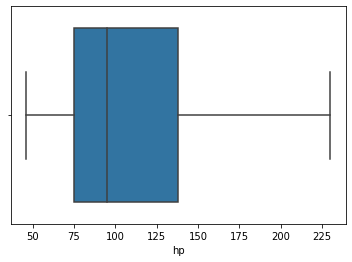

In [22]:
sns.boxplot(cars['hp'])

Cada um dos quartis possui a mesma quantidade de valores para a variável “hp”.

10 - Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável “hp”? 

In [23]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [24]:
cars_normalizar = cars.drop('brand', axis=1)
cars_normalizar.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [25]:
from sklearn.preprocessing import StandardScaler
normalizar = StandardScaler() #instanciando o standart scaler

scaler = normalizar.fit(cars_normalizar.values) #fitando o dataset para normalizar

cars_normalizado = scaler.transform(cars_normalizar.values) #normalizando

cars_normalizado = pd.DataFrame(cars_normalizado, columns=cars_normalizar.columns) #transformando o array numpy em data frame do pandas

In [26]:
cars_normalizado['hp'].max()

3.05870398977614

11 - Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada com pela primeira componente principal

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)

In [37]:
principais = pca.fit_transform(cars_normalizado)
pca.explained_variance_ratio_

array([0.72371349, 0.12675138, 0.09126131, 0.02773591, 0.01766794,
       0.00798425, 0.00488572])

12 - Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar que

In [29]:
principais.explained_variance_ratio_

array([0.72371349, 0.12675138, 0.09126131, 0.02773591, 0.01766794,
       0.00798425, 0.00488572])

In [38]:
principais_componentes = pd.DataFrame(principais)
principais_componentes.head()

,0,1,2,3,4,5,6
0,3.485219,0.526326,-0.139738,0.258792,0.086902,-0.179206,0.079078
1,-2.176912,-0.285424,-1.304613,-0.100465,-0.289698,-0.041147,-0.013127
2,2.684973,1.046946,-0.732156,0.498227,-0.535168,-0.075745,0.159956
3,3.534648,0.847619,-0.801334,0.506630,-0.435696,-0.144237,-0.483162
4,-2.299222,0.194808,-0.221704,0.079650,-0.175655,0.015566,-0.069958


In [46]:
principais_componentes_k = principais_componentes.iloc[:, :3] #selecionando todas as linhas e as 3 primeiras colunas
principais_componentes_k.columns = ['componente 1', 'componente 2', 'componente 3']

In [59]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(principais_componentes_k) #Parâmetros dados no desafio

In [61]:
principais_componentes_k['cluster'] = kmeans.labels_ #adicionando coluna do cluster em que o carro está
principais_componentes_k

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,componente 1,componente 2,componente 3,cluster
0,3.485219,0.526326,-0.139738,0
1,-2.176912,-0.285424,-1.304613,2
2,2.684973,1.046946,-0.732156,0
3,3.534648,0.847619,-0.801334,0
4,-2.299222,0.194808,-0.221704,2
...,...,...,...,...
256,1.815679,-1.347280,0.468559,0
257,-2.713476,-0.100927,-0.820777,2
258,-0.053849,-1.582706,-0.285137,1
259,0.785386,1.182446,0.609715,1


In [63]:
principais_componentes_k['cluster'].value_counts() #Contando a quantidade de elementos dos clusters gerados

1    109
2     77
0     75
Name: cluster, dtype: int64

13 - Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devem ser considerados eficientes. Utilize as colunas ['cylinders'    ,'cubicinches' ,'hp' ,'weightlbs','time-to-60'] como entradas e como saída a coluna de eficiência criada.

Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?

In [87]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [84]:
entradas = np.array(cars[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs' ,'time-to-60']])
saidas = np.array(cars['mpg'] > 25).astype(int) #zero = maior, 1 = menor

In [92]:
entradas

array([[8.000e+00, 3.500e+02, 1.650e+02, 4.209e+03, 1.200e+01],
       [4.000e+00, 8.900e+01, 7.100e+01, 1.925e+03, 1.400e+01],
       [8.000e+00, 3.020e+02, 1.400e+02, 3.449e+03, 1.100e+01],
       ...,
       [6.000e+00, 2.320e+02, 1.120e+02, 2.835e+03, 1.500e+01],
       [6.000e+00, 2.320e+02, 1.000e+02, 3.288e+03, 1.600e+01],
       [6.000e+00, 2.500e+02, 1.050e+02, 3.353e+03, 1.500e+01]])

In [93]:
saidas

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(entradas, saidas, test_size=0.30, random_state=42)

In [99]:
from sklearn.tree import DecisionTreeClassifier
classificador = DecisionTreeClassifier(random_state=42)

In [102]:
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_pred)
acuracia

0.8734177215189873

14 - Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, como mostrado anteriormente, é INCORRETO afirmar:

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[33,  8],
       [ 2, 36]])

Existem duas vezes mais veículos considerados não eficientes que instâncias de veículos eficientes

15 - Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, aplique o modelo de regressão logística como mostrado na descrição do trabalho.


Comparando os resultados obtidos com o modelo de árvore de decisão, é INCORRETO afirmar que:

In [107]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42).fit(x_train, y_train)
logreg_y_pred = logreg.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [110]:
accuracy_score(y_test, logreg_y_pred)

0.8607594936708861

# Fim

# Visite o meu [github](https://github.com/k3ybladewielder) <3